In [12]:
import pandas as pd 

In [13]:
data = pd.read_csv("../data/booli.csv")
data.drop(columns=["idx"],inplace=True)
data.head()

,street_name,area,city,price,size,type
0,Tellusgatan 3,Planetstaden,Lund,625000.0,13.0,Lägenhet
1,Bivägen 21,Ringsegård,Falkenberg,4500000.0,133.0,Villa
2,Volontärsgatan 3B,Västra Berga,Helsingborg,1770000.0,92.0,Lägenhet
3,Tegelbruksvägen 7F,Ekerö Centrum,Ekerö,2550000.0,61.0,Lägenhet
4,Sandelsgatan 35,Gärdet,Stockholm,7800000.0,65.0,Lägenhet


In [14]:
data['Full Address'] = data[['street_name', 'area', 'city']].apply(lambda x: ', '.join(x), axis=1)
data.head()

,street_name,area,city,price,size,type,Full Address
0,Tellusgatan 3,Planetstaden,Lund,625000.0,13.0,Lägenhet,"Tellusgatan 3, Planetstaden , Lund"
1,Bivägen 21,Ringsegård,Falkenberg,4500000.0,133.0,Villa,"Bivägen 21, Ringsegård , Falkenberg"
2,Volontärsgatan 3B,Västra Berga,Helsingborg,1770000.0,92.0,Lägenhet,"Volontärsgatan 3B, Västra Berga , Helsingborg"
3,Tegelbruksvägen 7F,Ekerö Centrum,Ekerö,2550000.0,61.0,Lägenhet,"Tegelbruksvägen 7F, Ekerö Centrum , Ekerö"
4,Sandelsgatan 35,Gärdet,Stockholm,7800000.0,65.0,Lägenhet,"Sandelsgatan 35, Gärdet , Stockholm"


<Axes: ylabel='Frequency'>

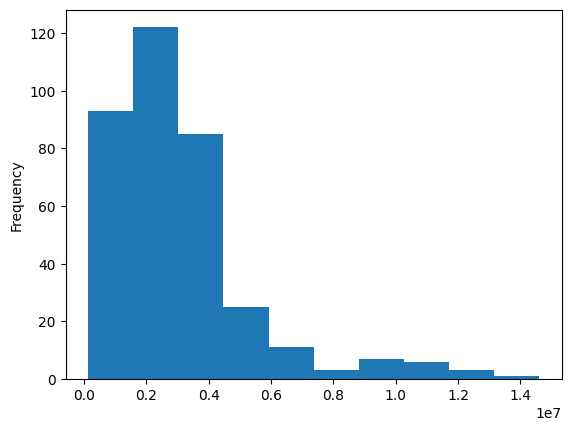

In [15]:
data["price"].plot.hist()

In [16]:
data["type"].unique()

array(['Lägenhet ', 'Villa ', 'Radhus ', 'Kedjehus ', 'Gård ',
       'Fritidshus ', 'Tomt/Mark ', 'Parhus '], dtype=object)

In [25]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

data["lat"] = 0.0
data["lng"] = 0.0
data["alt"] = 0.0

for idx, row in data.head().iterrows():
    geolocator = Nominatim(user_agent="Geopy Library") 
    location = geolocator.geocode(row["Full Address"])
    if location:
        data.loc[idx, "lat"] = location.latitude
        data.loc[idx, "lng"] = location.longitude
        data.loc[idx, "alt"] = location.altitude
    #print((location.latitude, location.longitude))


In [26]:
data

,street_name,area,city,price,size,type,Full Address,lat,lng,alt
0,Tellusgatan 3,Planetstaden,Lund,625000.0,13.0,Lägenhet,"Tellusgatan 3, Planetstaden , Lund",55.698258,13.209481,0.0
1,Bivägen 21,Ringsegård,Falkenberg,4500000.0,133.0,Villa,"Bivägen 21, Ringsegård , Falkenberg",56.870312,12.554654,0.0
2,Volontärsgatan 3B,Västra Berga,Helsingborg,1770000.0,92.0,Lägenhet,"Volontärsgatan 3B, Västra Berga , Helsingborg",0.000000,0.000000,0.0
3,Tegelbruksvägen 7F,Ekerö Centrum,Ekerö,2550000.0,61.0,Lägenhet,"Tegelbruksvägen 7F, Ekerö Centrum , Ekerö",0.000000,0.000000,0.0
4,Sandelsgatan 35,Gärdet,Stockholm,7800000.0,65.0,Lägenhet,"Sandelsgatan 35, Gärdet , Stockholm",59.343907,18.093797,0.0
...,...,...,...,...,...,...,...,...,...,...
351,Bengt Färjares väg 34,Stocksund,Danderyd,9300000.0,109.0,Lägenhet,"Bengt Färjares väg 34, Stocksund , Danderyd",0.000000,0.000000,0.0
352,Grundviksvägen 6J,Linanäs,Österåker,2500000.0,114.0,Radhus,"Grundviksvägen 6J, Linanäs , Österåker",0.000000,0.000000,0.0
353,Mjölnarvägen 10A,Kvarnholmen,Nacka,6500000.0,69.0,Lägenhet,"Mjölnarvägen 10A, Kvarnholmen , Nacka",0.000000,0.000000,0.0
354,Grönfinksvägen 29,Vidja,Huddinge,3400000.0,51.0,Villa,"Grönfinksvägen 29, Vidja , Huddinge",0.000000,0.000000,0.0


In [29]:
data = pd.read_csv("./booli_with_lat_long_0.csv")
data.drop(columns=["idx"],inplace=True)
data["alt"] = 0.0

In [30]:
len(data.loc[data["lat"] !=0])

239

In [31]:
data.to_csv("./booli_with_lat_long_0.csv")

In [32]:
data = data.loc[data["lat"] !=0]

In [ ]:
import typing
dt:typing.List[typing.Dict] = []
for idx, row in data.iterrows():
    r = {
     "type": "Feature",
      "properties": {
        "id":idx,
        "type": row["type"],
        "price": row["price"],
        "size": row["size"],
      },
      "geometry": {"type": "Point", "coordinates": [row["lat"], row["lng"], row["alt"]]}
    }
    dt.append(r)
    
dt

[{'type': 'Feature',
  'properties': {'id': 0,
   'type': 'Lägenhet ',
   'price': 625000.0,
   'size': 13.0},
  'geometry': {'type': 'Point',
   'coordinates': [55.698257549999994, 13.209481083930164, 0.0]}},
 {'type': 'Feature',
  'properties': {'id': 1, 'type': 'Villa ', 'price': 4500000.0, 'size': 133.0},
  'geometry': {'type': 'Point',
   'coordinates': [56.870312104059686, 12.55465440436976, 0.0]}},
 {'type': 'Feature',
  'properties': {'id': 4,
   'type': 'Lägenhet ',
   'price': 7800000.0,
   'size': 65.0},
  'geometry': {'type': 'Point', 'coordinates': [59.343907, 18.0937966, 0.0]}},
 {'type': 'Feature',
  'properties': {'id': 7,
   'type': 'Lägenhet ',
   'price': 450000.0,
   'size': 56.5},
  'geometry': {'type': 'Point', 'coordinates': [62.4607527, 17.3536288, 0.0]}},
 {'type': 'Feature',
  'properties': {'id': 9,
   'type': 'Lägenhet ',
   'price': 760000.0,
   'size': 76.0},
  'geometry': {'type': 'Point', 'coordinates': [56.6905472, 16.3410303, 0.0]}},
 {'type': 'Feature

In [35]:
import json

import json
with open('./booli.json', 'w') as f:
    json.dump(dt, f)